In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style for seaborn
sns.set(style="whitegrid")


In [24]:
# Load the data from the CSV file
file_path = r'D:\TEST\Olympics\medals.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,medal_type,medal_code,medal_date,name,country_code,gender,discipline,event,event_type,url_event,code
0,Gold Medal,1,2024-07-27,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136
1,Silver Medal,2,2024-07-27,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520
2,Bronze Medal,3,2024-07-27,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147
3,Gold Medal,1,2024-07-27,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173
4,Silver Medal,2,2024-07-27,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525


In [25]:
# Check the unique values in the gender column
df['gender'].unique()


array(['M', 'W', 'X', 'O'], dtype=object)

In [28]:
# Filter the DataFrame to only include 'M' and 'W'
df_filtered = df[df['gender'].isin(['M', 'W'])]

# Group by discipline and gender, then count the number of medals
medals_by_discipline_and_gender_filtered = df_filtered.groupby(['discipline', 'gender']).size().unstack(fill_value=0)

# Add a column for the total number of medals for sorting
medals_by_discipline_and_gender_filtered['Total'] = medals_by_discipline_and_gender_filtered.sum(axis=1)

# Sort the disciplines by total number of medals in descending order
medals_by_discipline_and_gender_filtered = medals_by_discipline_and_gender_filtered.sort_values(by='Total', ascending=False)

# Drop the total column for plotting
medals_by_discipline_and_gender_filtered.drop(columns='Total', inplace=True)

# Display the sorted data
medals_by_discipline_and_gender_filtered.head()


gender,M,W
discipline,,
Athletics,69,67
Swimming,51,51
Wrestling,48,24
Judo,28,28
Boxing,28,24


<Figure size 1400x800 with 0 Axes>

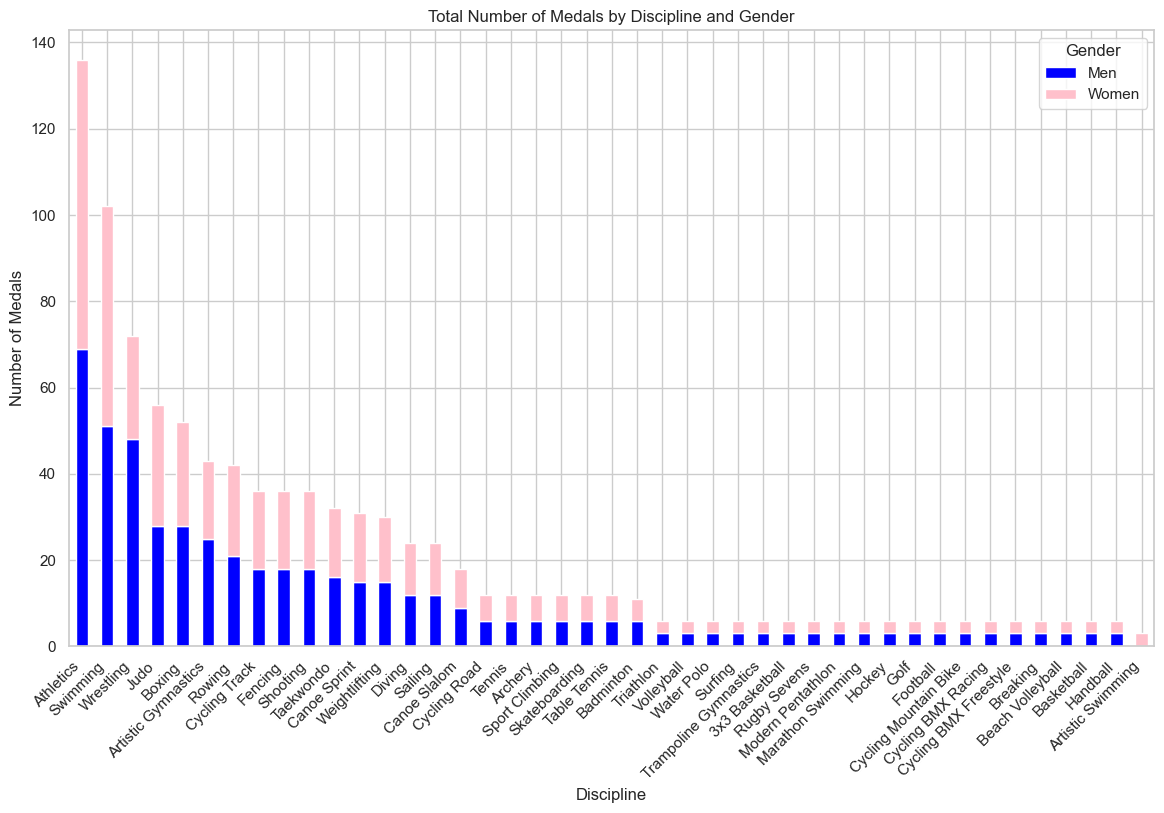

In [29]:
# Plotting the bar chart with filtered data
plt.figure(figsize=(14, 8))

# Create a bar plot with different colors for genders
medals_by_discipline_and_gender_filtered.plot(kind='bar', stacked=True, color=['blue', 'pink'], figsize=(14, 8))

plt.title('Total Number of Medals by Discipline and Gender')
plt.xlabel('Discipline')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Gender', labels=['Men', 'Women'])
plt.show()


In [30]:
# Filter and display all rows where the discipline is 'Wrestling'
wrestling_data = df[df['discipline'] == 'Wrestling']

# Display the filtered DataFrame
wrestling_data


,medal_type,medal_code,medal_date,name,country_code,gender,discipline,event,event_type,url_event,code
609,Gold Medal,1,2024-08-06,Mijain LOPEZ NUNEZ,CUB,M,Wrestling,Men's Greco-Roman 130kg,HATH,/en/paris-2024/results/wrestling/men-s-greco-r...,1571506
610,Silver Medal,2,2024-08-06,Yasmani ACOSTA FERNANDEZ,CHI,M,Wrestling,Men's Greco-Roman 130kg,HATH,/en/paris-2024/results/wrestling/men-s-greco-r...,1935199
611,Bronze Medal,3,2024-08-06,Amin MIRZAZADEH,IRI,M,Wrestling,Men's Greco-Roman 130kg,HATH,/en/paris-2024/results/wrestling/men-s-greco-r...,1544882
612,Bronze Medal,3,2024-08-06,MENG Lingzhe,CHN,M,Wrestling,Men's Greco-Roman 130kg,HATH,/en/paris-2024/results/wrestling/men-s-greco-r...,1919983
613,Gold Medal,1,2024-08-06,FUMITA Kenichiro,JPN,M,Wrestling,Men's Greco-Roman 60kg,HATH,/en/paris-2024/results/wrestling/men-s-greco-r...,1939713
...,...,...,...,...,...,...,...,...,...,...,...
1029,Bronze Medal,3,2024-08-11,Amirali AZARPIRA,IRI,M,Wrestling,Men's Freestyle 97kg,HATH,/en/paris-2024/results/wrestling/men-s-freesty...,1543095
1030,Gold Medal,1,2024-08-11,KAGAMI Yuka,JPN,W,Wrestling,Women's Freestyle 76kg,HATH,/en/paris-2024/results/wrestling/women-s-frees...,1939701
1031,Silver Medal,2,2024-08-11,Kennedy Alexis BLADES,USA,W,Wrestling,Women's Freestyle 76kg,HATH,/en/paris-2024/results/wrestling/women-s-frees...,1955344
1032,Bronze Medal,3,2024-08-11,Milaimy de la Carid. MARIN POTRILLE,CUB,W,Wrestling,Women's Freestyle 76kg,HATH,/en/paris-2024/results/wrestling/women-s-frees...,1571936


In [31]:
# Group the data by discipline and event, then count the number of medals
medals_by_discipline_and_event = df.groupby(['discipline', 'event']).size().reset_index(name='medal_count')

# Display the first few rows to check the structure
medals_by_discipline_and_event.head()


,discipline,event,medal_count
0,3x3 Basketball,Men,3
1,3x3 Basketball,Women,3
2,Archery,Men's Individual,3
3,Archery,Men's Team,3
4,Archery,Mixed Team,3


In [32]:
# Sort the data by discipline and then by the number of medals within each event
medals_by_discipline_and_event = medals_by_discipline_and_event.sort_values(by=['discipline', 'medal_count'], ascending=[True, False])

# Display the organized data
medals_by_discipline_and_event.head(20)  # Show the top 20 for a quick view


,discipline,event,medal_count
0,3x3 Basketball,Men,3
1,3x3 Basketball,Women,3
2,Archery,Men's Individual,3
3,Archery,Men's Team,3
4,Archery,Mixed Team,3
5,Archery,Women's Individual,3
6,Archery,Women's Team,3
9,Artistic Gymnastics,Men's Horizontal Bar,4
7,Artistic Gymnastics,Men's All-Around,3
8,Artistic Gymnastics,Men's Floor Exercise,3


In [33]:
# Pivot the table to have disciplines as rows and events as columns
pivot_table = medals_by_discipline_and_event.pivot_table(index='discipline', columns='event', values='medal_count', fill_value=0)

# Display the pivot table
pivot_table.head()


event,10m Air Pistol Men,10m Air Pistol Mixed Team,10m Air Pistol Women,10m Air Rifle Men,10m Air Rifle Mixed Team,10m Air Rifle Women,25m Pistol Women,25m Rapid Fire Pistol Men,4 x 400m Relay Mixed,50m Rifle 3 Positions Men,...,Women's Synchronised 3m Springboard,Women's Team,Women's Team Pursuit,Women's Team Sprint,Women's Triple Jump,Women's Uneven Bars,Women's Vault,Women's Windsurfing,Women's Épée Individual,Women's Épée Team
discipline,,,,,,,,,,,,,,,,,,,,,
3x3 Basketball,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Archery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Artistic Gymnastics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0
Artistic Swimming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Athletics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
